In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [3]:
'''IMPORTING THE LIBRARIES
EPLORATORY DATA ANALYSIS
do non graphical analysis
changing categorical values to numerical values
ghraphical analysis
    univariate analysis
    bivariate analysis
    multivaraiate analysis
check outliers and remove if present
check multicollinearity
remove multicollinearity if present
apply feature scaling methods on numerical features
apply resampling methods to balance the classes
split the dataset into features and target variable and then train data and test dataset by using train_test_split() method
Model Building
Cross Validation Score
Finalizing the Model
Predicting the saved Model'''

'IMPORTING THE LIBRARIES\nEPLORATORY DATA ANALYSIS\ndo non graphical analysis\nchanging categorical values to numerical values\nghraphical analysis\n    univariate analysis\n    bivariate analysis\n    multivaraiate analysis\ncheck outliers and remove if present\ncheck multicollinearity\nremove multicollinearity if present\napply feature scaling methods on numerical features\napply resampling methods to balance the classes\nsplit the dataset into features and target variable and then train data and test dataset by using train_test_split() method\nModel Building\nCross Validation Score\nPloting ROC AUC Curve\nPredicting the saved Model'

In [4]:
df.head(15)

age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.71780
14   27    male  42.130         0    yes  southeast  39611.75770

In [5]:
df.tail(15)

age     sex     bmi  children smoker     region      charges
1323   42  female  40.370         2    yes  southeast  43896.37630
1324   31    male  25.935         1     no  northwest   4239.89265
1325   61    male  33.535         0     no  northeast  13143.33665
1326   42  female  32.870         0     no  northeast   7050.02130
1327   51    male  30.030         1     no  southeast   9377.90470
1328   23  female  24.225         2     no  northeast  22395.74424
1329   52    male  38.600         2     no  southwest  10325.20600
1330   57  female  25.740         2     no  southeast  12629.16560
1331   23  female  33.400         0     no  southwest  10795.93733
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

# Exploratory Data Analysis

In [6]:
df.shape

(1338, 7)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

we can see that 2 columns are in int64 data type, 3 columns have object data type,2 columns have float64 datatype. we have to treat the object data type further.

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

so no null or blank values are present in the dataset

In [10]:
df.info() #there is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Let us Visualize using heatmap to find if the data have null values

<Axes: >

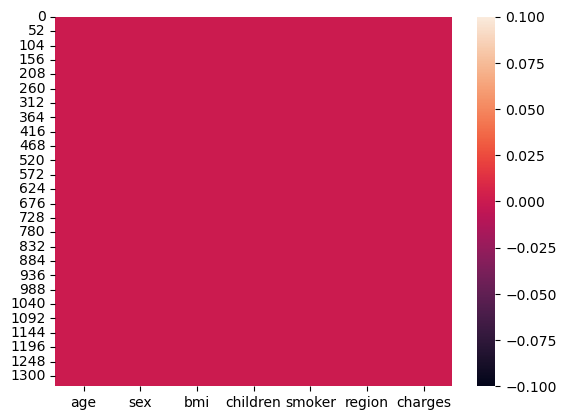

In [11]:
sns.heatmap(df.isnull()) # we can cleaerly visualize that there is no null value present

In [12]:
# checking the value counts of each column
for i in df.columns:
    print (df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [13]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

# Changing Categorical values to Numerical Values

In [14]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


So all the categorical vdata has changed to Numerical Data  

# Descriptive Statistics

In [16]:
df.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.494768    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     0.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.514948  13270.422265  
std       1.105572  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.428010

This gives a statistical explanation of the columns.The dataset looks perfect as theres no invalid or negative value present
It can be observed that mean is has na noticeably greater than median in column "Charges" .So it is slightly skewed towards the right.
We can also see that max and 75% has a huge difference in column "Charges".  this can be beacuase of some exceptional cases

In [17]:
df.corr()

age       sex       bmi  children    smoker    region   charges
age       1.000000  0.020856  0.109272  0.042469 -0.025019  0.003243  0.299008
sex       0.020856  1.000000 -0.046371 -0.017163 -0.076185 -0.007974 -0.057292
bmi       0.109272 -0.046371  1.000000  0.012759  0.003750  0.156686  0.198341
children  0.042469 -0.017163  0.012759  1.000000  0.007673 -0.001907  0.067998
smoker   -0.025019 -0.076185  0.003750  0.007673  1.000000  0.013246  0.787251
region    0.003243 -0.007974  0.156686 -0.001907  0.013246  1.000000  0.011741
charges   0.299008 -0.057292  0.198341  0.067998  0.787251  0.011741  1.000000

<Axes: >

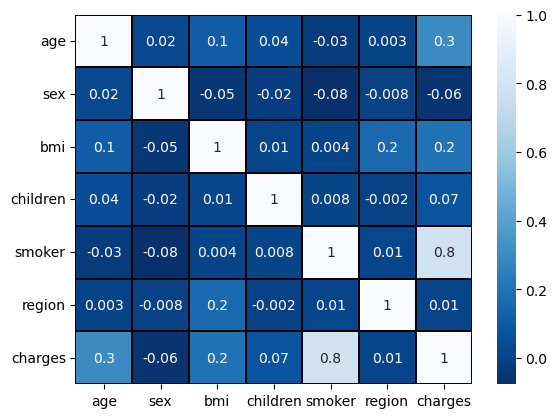

In [18]:
sns.heatmap(df.corr(), linewidths=0.1,fmt=".1g",linecolor="black", annot=True,cmap="Blues_r")

there is no much positive correlation
0 = no correlation, -0.3 or +0.3 less corr, greater than -0.5 or + 0.5 moderate corr, greater than -0.7 or +0.7 is high correlation

In [64]:
df.corr()['charges'].sort_values()

sex        -0.057292
region      0.011741
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

In [63]:
df.nunique().to_frame("No.of Unique Values")

No.of Unique Values
age                        47
sex                         2
bmi                       548
children                    6
smoker                      2
region                      4
charges                  1337

# Data Visualization and Analysis

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


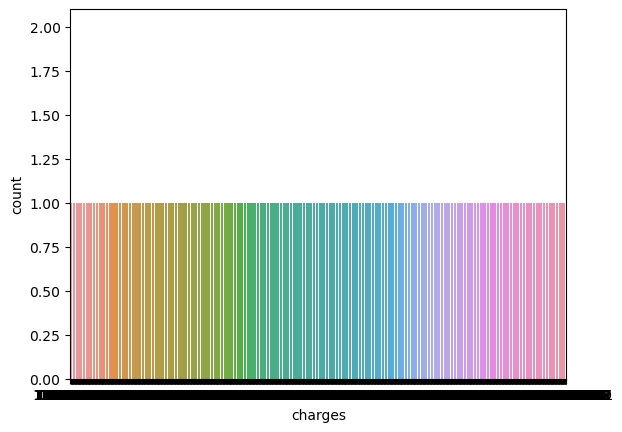

In [20]:
#Univarity Analysis
charges = sns.countplot(x='charges',data=df)
print (df['charges'].value_counts())

All the values are unique in column "Charges". We can also see the the charges of currency 1639.56 is repeated twice. and it havs a huge difference wheen compared to other charges

0    676
1    662
Name: sex, dtype: int64


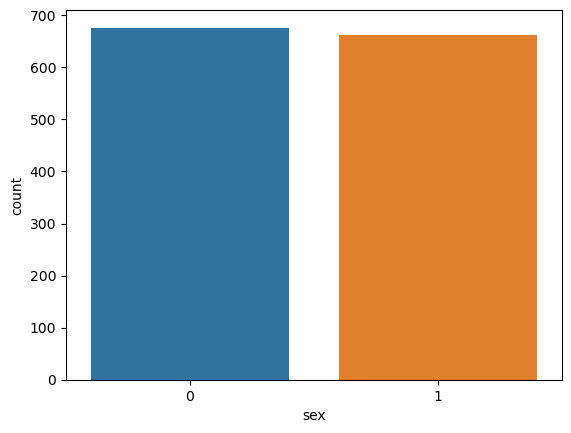

In [21]:
Sex = sns.countplot(x='sex',data=df)
print (df['sex'].value_counts())

Almost both types of Genderare invvolved in the Data

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


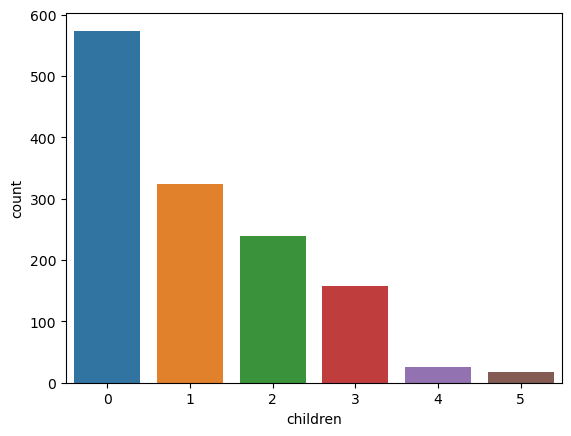

In [22]:
Children = sns.countplot(x='children',data=df)
print (df['children'].value_counts())

Maximum of Insurers havee no Children

0    1064
1     274
Name: smoker, dtype: int64


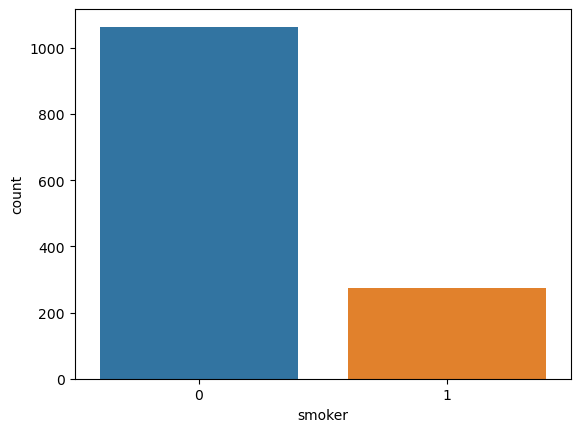

In [23]:
Smoker = sns.countplot(x='smoker',data=df)
print (df['smoker'].value_counts())

Maximum of insurers are Non-smokers

2    364
3    325
0    325
1    324
Name: region, dtype: int64


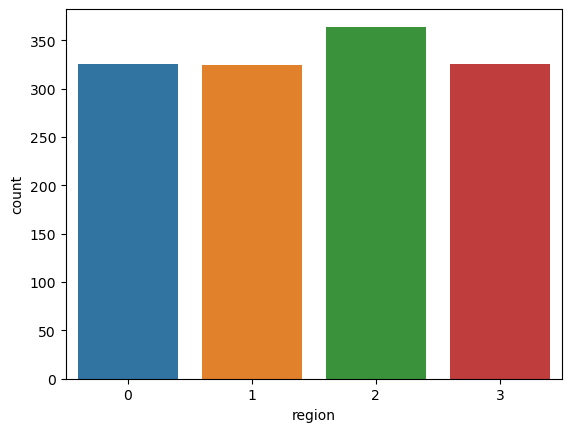

In [24]:
Region = sns.countplot(x='region',data=df)
print (df['region'].value_counts())

Major data is from Southeast region.

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


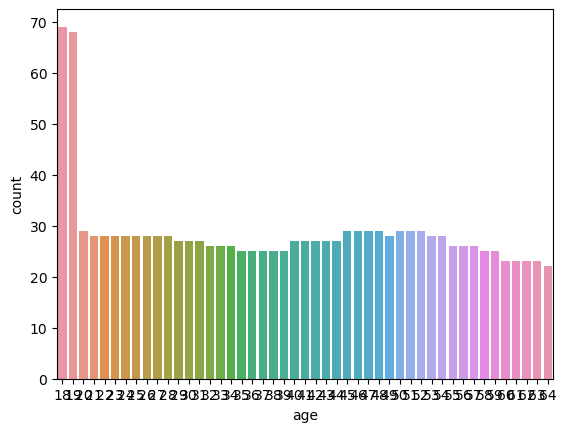

In [25]:
Age = sns.countplot(x='age',data=df)
print (df['age'].value_counts())

Most of the insurers are from the age 18-19. Age >60 have lesser counts

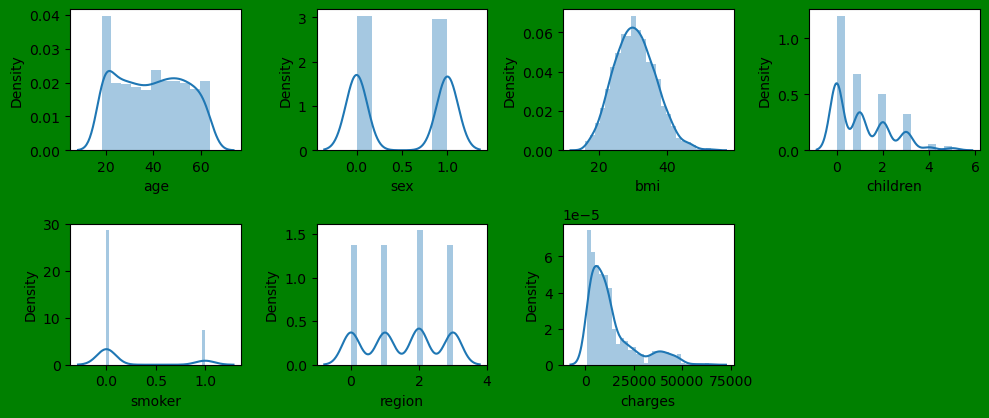

In [26]:
#Finding distribution of dat in each column
plt.figure(figsize =(10,6), facecolor = 'green')
plotnumber = 1

for column in df:
    if plotnumber <=7:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10)
        plt.yticks(rotation=0,fontsize=10)       
    plotnumber +=1
plt.tight_layout()

We can understand that Age, BMI and Smoker are the 3 columns which plays major roles for the Charges decided.

In [27]:
#Bivariate Analysis

<Axes: xlabel='age', ylabel='charges'>

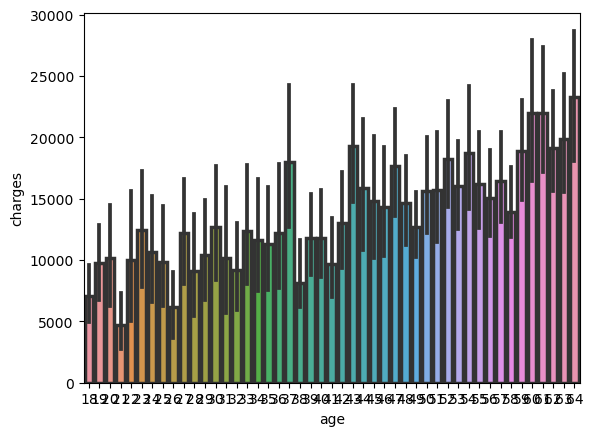

In [28]:
sns.barplot(x='age', y='charges', linewidth=2.5, errcolor='.2', edgecolor='.2', data=df)

As the age increases the Charges also increases.

<Axes: xlabel='charges', ylabel='bmi'>

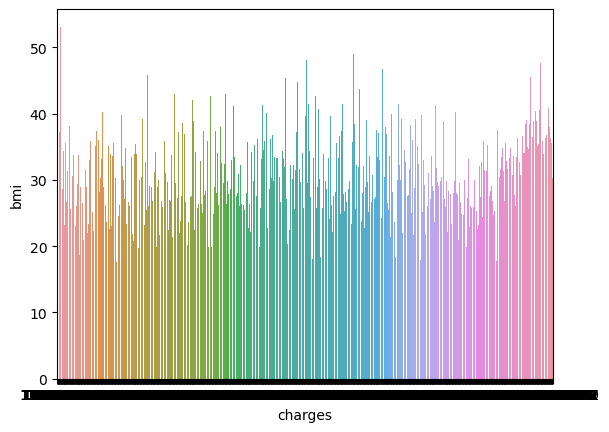

In [29]:
sns.barplot(x='charges', y='bmi', linewidth=2.5, data=df)

<Axes: xlabel='bmi', ylabel='charges'>

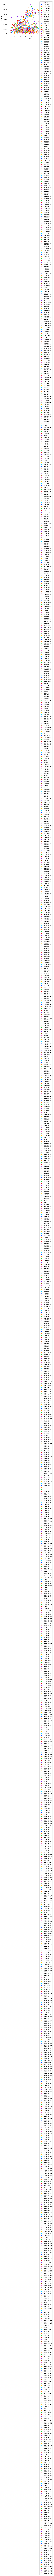

In [30]:
sns.scatterplot (x="bmi", y="charges",data=df, hue='charges',palette='bright')

charges are evenly spread wirh respect to BMI

<Axes: xlabel='sex', ylabel='charges'>

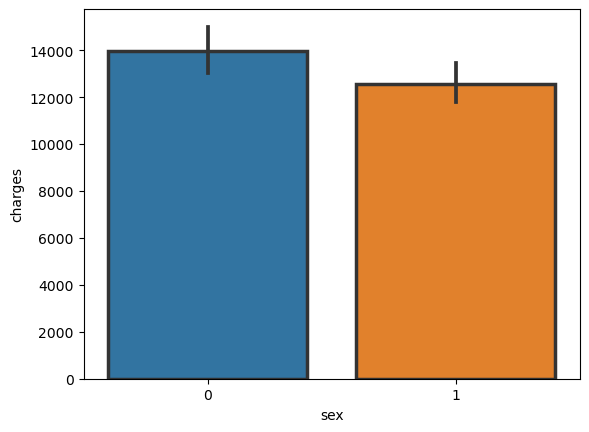

In [31]:
sns.barplot(x='sex', y='charges', linewidth=2.5, errcolor='.2', edgecolor='.2', data=df)

<Axes: xlabel='smoker', ylabel='charges'>

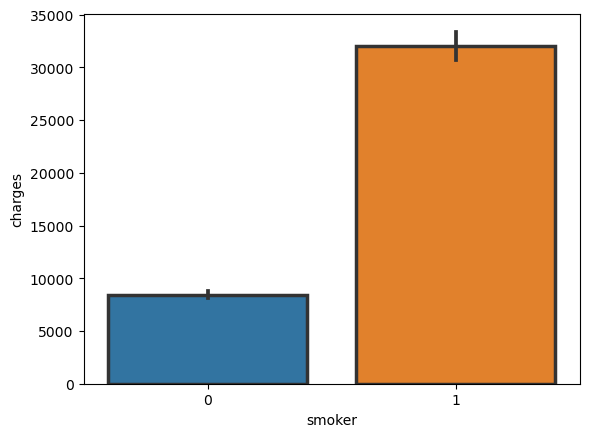

In [32]:
sns.barplot(x='smoker', y='charges', linewidth=2.5, errcolor='.2', edgecolor='.2', data=df)

we see that smoker has heavy impact on charges.

<Axes: xlabel='children', ylabel='charges'>

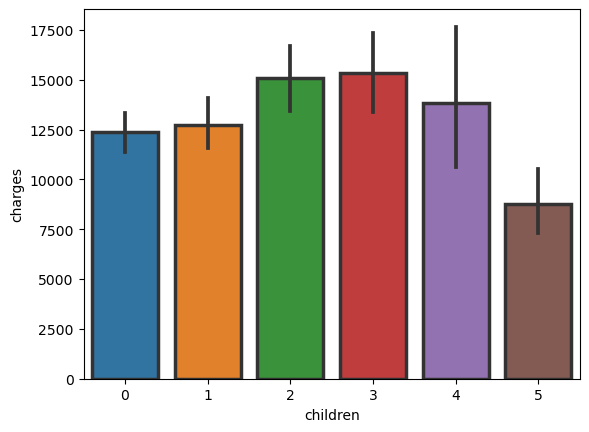

In [33]:
sns.barplot(x='children', y='charges', linewidth=2.5, errcolor='.2', edgecolor='.2', data=df)

In [34]:
#Multivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

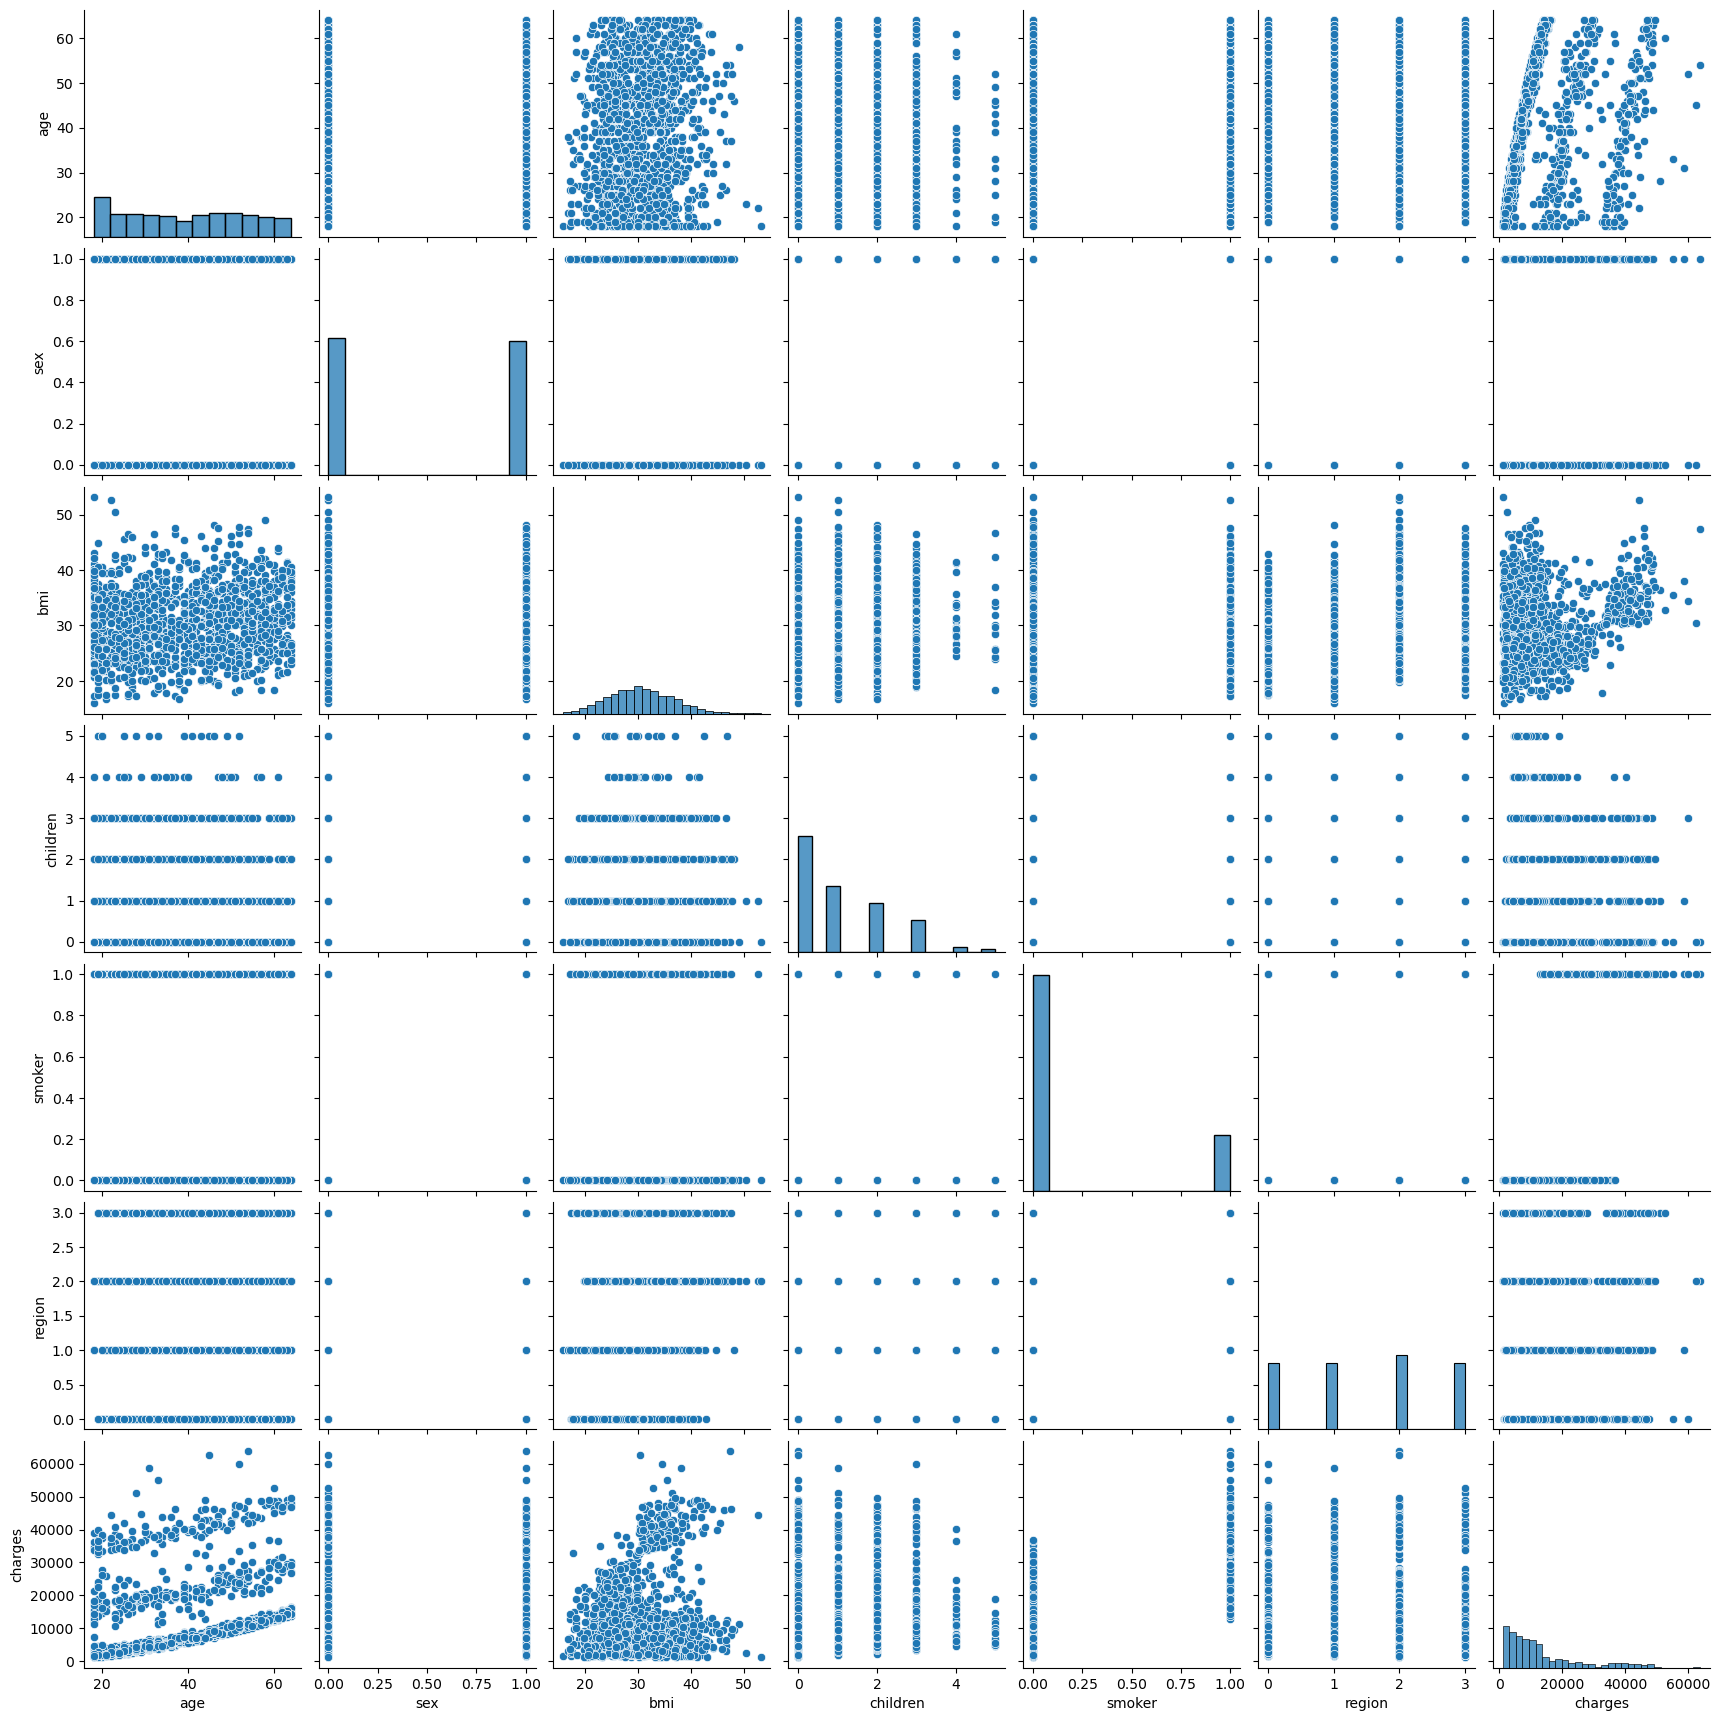

In [35]:
sns.pairplot(df,palette="Dark2")
plt.show

# Finding Outliers

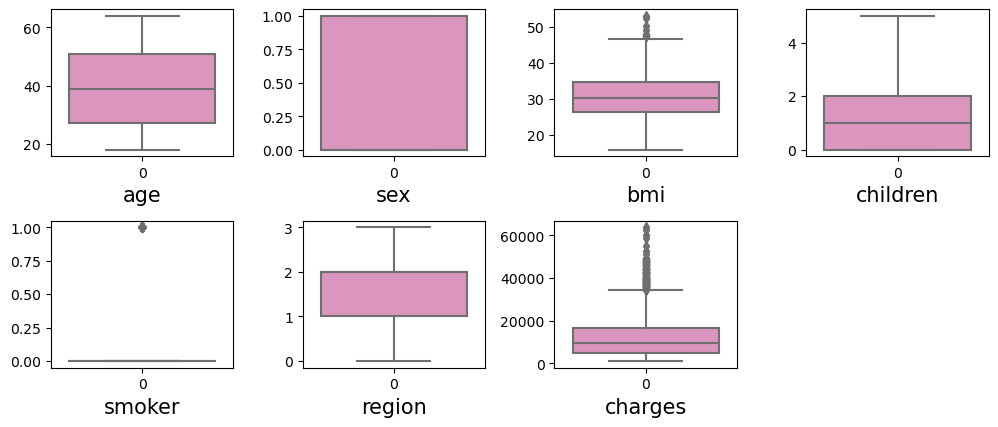

In [36]:
#checking outliers by Boxplot
plt.figure(figsize = (10,6), facecolor="white")
plotnumber= 1
for column in df:
    if plotnumber<=7:
        ax = plt.subplot (3,4,plotnumber)
        sns.boxplot (df[column],palette='Set2_r')
        plt.xlabel(column,fontsize= 15 )
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

we see outliers avilable in charges but that can exceptional cases looking the other factors ,Bmi-continous, smoker-categorical.  So we cannot call them outliers

# Finding skewness

In [66]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.037853
charges     1.515880
dtype: float64

we can see skewness in children, smoker and charges. But as smoker is categorical and chilren donot have much impact and charges is Target variable we cannot treat them.Rest of the columns donot have skewness. 

In [67]:
#Using Z-core for the outiers removal 
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [68]:
df1=df[(z<3).all(axis=1)]
df1

age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       3  16884.92400
1      18    0  33.770         1       0       2   1725.55230
2      28    0  33.000         3       0       2   4449.46200
3      33    0  22.705         0       0       0  21984.47061
4      32    0  28.880         0       0       0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       0  10600.54830
1334   18    1  31.920         0       0       1   2205.98080
1335   18    1  36.850         0       0       2   1629.83350
1336   21    1  25.800         0       0       3   2007.94500
1337   61    1  29.070         0       1       0  29141.36030

[1309 rows x 7 columns]

We see that now we are left with 1309 rows which is lesser than original. 

In [174]:
df1["charges"]=np.cbrt(df1["charges"])

In [175]:
df["children"]=np.cbrt(df["children"])
df["smoker"]=np.cbrt(df["smoker"])

In [176]:
df1.skew()

age         0.051340
sex         0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.022504
charges     0.481700
dtype: float64

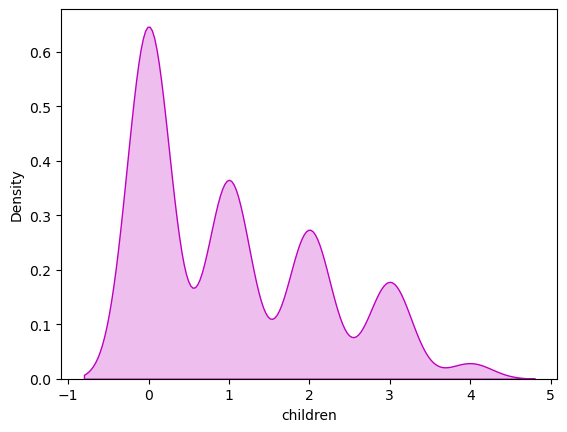

In [177]:
sns.distplot(df1['children'], color='m', kde_kws={"shade":True}, hist=False)
plt.show()

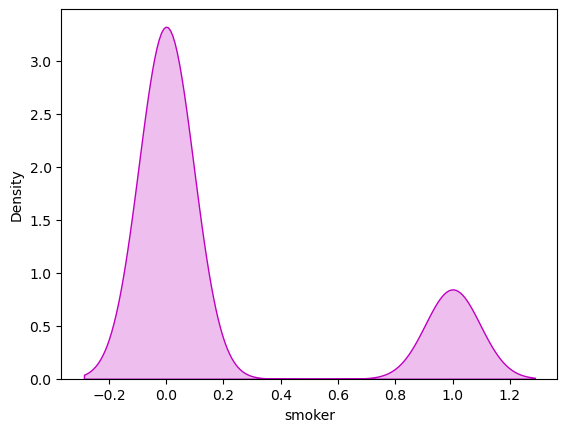

In [73]:
sns.distplot(df1['smoker'], color='m', kde_kws={"shade":True}, hist=False)
plt.show()

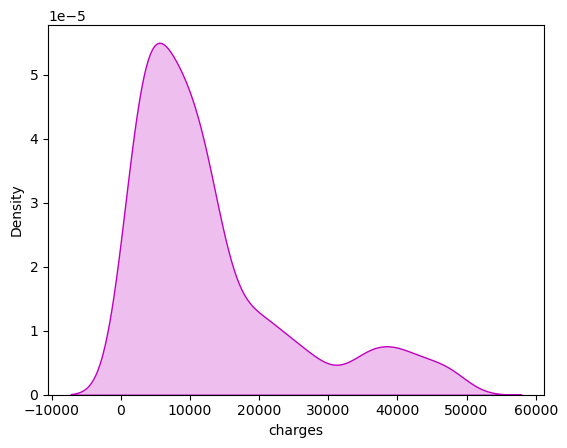

In [74]:
sns.distplot(df1['charges'], color='m', kde_kws={"shade":True}, hist=False)
plt.show()

In [178]:
df1.skew()

age         0.051340
sex         0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.022504
charges     0.481700
dtype: float64

In [ ]:
we see that skewness has minimally decreased in some columns

# Separating Features and Label(target)

In [179]:
x=df1.drop("charges",axis=1)
y=df1["charges"]

# Feature Scaling using Min-Max Scaling (Normalization)

In [180]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_scaler = mms.fit_transform(x)
x_scaler.shape

(1309, 6)

In [181]:
x

age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       3
1      18    0  33.770         1       0       2
2      28    0  33.000         3       0       2
3      33    0  22.705         0       0       0
4      32    0  28.880         0       0       0
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       0
1334   18    1  31.920         0       0       1
1335   18    1  36.850         0       0       2
1336   21    1  25.800         0       0       3
1337   61    1  29.070         0       1       0

[1309 rows x 6 columns]

In [182]:
y

0       25.654666
1       11.994331
2       16.447599
3       28.013799
4       15.695891
          ...    
1333    21.967271
1334    13.017690
1335    11.768318
1336    12.615872
1337    30.773007
Name: charges, Length: 1309, dtype: float64

In [183]:
y.value_counts()

11.791690    2
25.654666    1
23.843311    1
21.843879    1
19.348877    1
            ..
30.469610    1
10.475061    1
33.346029    1
16.796026    1
30.773007    1
Name: charges, Length: 1308, dtype: int64

data is not imbalanced

# Multicollinearity

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
v=variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[v(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["Features"]=x.columns
vif

VIF Values  Features
0    2.942538       age
1    1.790751       sex
2    4.482675       bmi
3    1.768383  children
4    1.225503    smoker
5    2.671149    region

In [ ]:
All vif values are less than 5 that mean there is no multicollinearity. 

In [185]:
x.value_counts()

age  sex  bmi     children  smoker  region
18   1    30.115  0         0       1         2
19   0    30.590  0         0       0         2
18   1    38.280  0         0       2         2
     0    15.960  0         0       1         1
48   0    24.420  0         1       2         1
                                             ..
31   0    27.645  2         0       1         1
          26.885  1         0       1         1
          25.935  1         0       0         1
          25.900  3         1       3         1
64   1    39.700  0         0       3         1
Length: 1306, dtype: int64

In [186]:
y.value_counts()

11.791690    2
25.654666    1
23.843311    1
21.843879    1
19.348877    1
            ..
30.469610    1
10.475061    1
33.346029    1
16.796026    1
30.773007    1
Name: charges, Length: 1308, dtype: int64

# Modelling or Model Buildingn and Cross_valuation Score

In [40]:
#Importing Libraries

In [241]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN

In [242]:
print('Size of x_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of x_test : ', x_test.shape)
print('Size of y_test : ', y_test.shape)

Size of x_train :  (1047, 6)
Size of y_train :  (1047,)
Size of x_test :  (262, 6)
Size of y_test :  (262,)


In [189]:
maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum r2 score is',maxAccu,'on Random_state',maxRS)

Maximum r2 score is 0.8456330316344539 on Random_state 37


In [190]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:-',mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test, pred_LR)))
score = cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is =', (r2_score(y_test,pred_LR) - score.mean())*100)

R2_score: 0.8032597602641978
R2_score on training Data: 76.95740727641304
Mean Absolute Error:- 1.9360961714088052
Mean Squared Error:- 8.377770275890999
Root Mean Squared Error:- 2.8944378168983005
[0.80730721 0.71305087 0.82353033 0.76732792 0.75804607]
0.773852480637685
Difference between R2 score and cross validation score is = 2.9407279626512794


R2 score is 0.80 which near 1, so there is no error in the regression line, which is fine and difference is 2.9

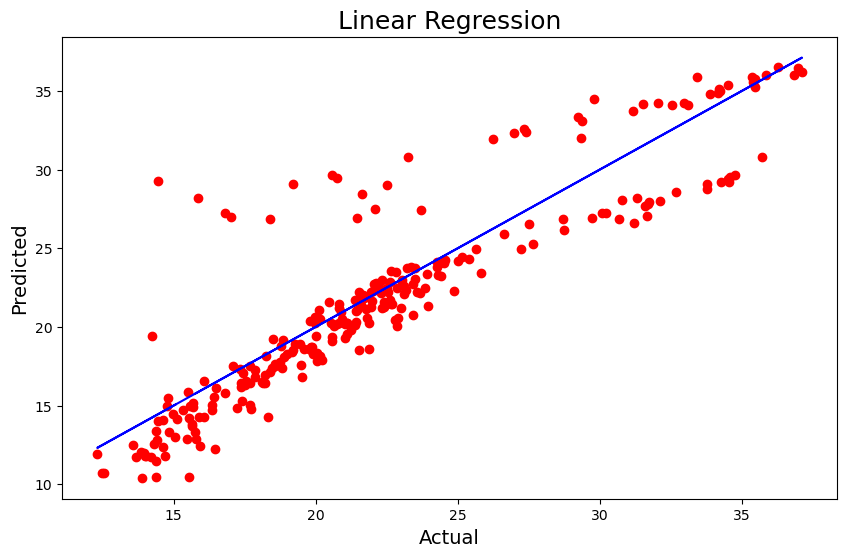

In [191]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [192]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test, pred_RFR)))
score1 = cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is – ', (r2_score(y_test,pred_RFR) - score1.mean())*100)

R2_score: 0.8325106864270422
R2_score on training Data: 96.93157565441584
Mean Absolute Error:- 1.5058412378037487
Mean Squared Error:- 7.132180964429133
Root Mean Squared Error:- 2.6706143421372417
[0.84133523 0.72419369 0.83906601 0.81314431 0.80055044]
0.8036579332987361
Difference between R2 score and cross validation score is –  2.885275312830604


R2 score is 0.83 which near 1, so there is no error in the regression line, which is perfect,and difference iss 2.88

In [193]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test, pred_knn)))
score2 = cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is =', (r2_score(y_test,pred_knn) - score2.mean())*100)

R2_score: 0.8339397817057508
R2_score on training Data: 84.77335133936067
Mean Absolute Error:- 1.6409449533366915
Mean Squared Error:- 7.071325940751932
Root Mean Squared Error:- 2.6591964840439926
[0.25330383 0.20219681 0.22900341 0.25060542 0.12750033]
0.21252196002469778
Difference between R2 score and cross validation score is = 62.141782168105294


R2 score is 0.83 which near 1, so there is no error in the regression line, which is perfect,and differnce is 62.4

In [194]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test, pred_GBR)))
score3 = cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is –', (r2_score(y_test,pred_GBR) - score3.mean())*100)

R2_score: 0.8623838210678453
R2_score on training Data: 87.67153801784438
Mean Absolute Error:- 1.4086871604284128
Mean Squared Error:- 5.860096210555237
Root Mean Squared Error:- 2.420763559407493
[0.86035868 0.7529237  0.87917956 0.8305603  0.81238335]
0.8270811171664871
Difference between R2 score and cross validation score is – 3.5302703901358146


R2 score is 0.86 which near 1, so there is no error in the regression line, which is perfect,and didference is 3.53

In [195]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test, pred_lasso)))
score4 = cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is – ', (r2_score(y_test,pred_lasso) - score4.mean())*100)

R2_score: 0.4032319076692422
R2_score on training Data: 36.91140760431729
Mean Absolute Error:- 3.9956735512026444
Mean Squared Error:- 25.41211697333816
Root Mean Squared Error:- 5.0410432425578495
[0.63551    0.61014594 0.64217997 0.63085988 0.5534141 ]
0.6144219757202286
Difference between R2 score and cross validation score is –  -21.11900680509864


R2 score is 0.40 which near 1, so there is no error in the regression line, which is a fine, and diffrence is 21.11

In [209]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:-',mean_squared_error(y_test, pred_rd))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test, pred_rd)))
score5 = cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is – ', (r2_score(y_test,pred_rd) - score5.mean())*100)

R2_score: 0.8038587148346525
R2_score on training Data: 76.95222428190615
Mean Absolute Error:- 1.9393198024970402
Mean Squared Error:- 8.352265052334785
Root Mean Squared Error:- 2.890028555626187
[0.80714392 0.71340298 0.82315091 0.76773519 0.75767138]
0.7738208761253464
Difference between R2 score and cross validation score is –  3.0037838709306097


R2 score is 0.80 which near 1, so there is no error in the regression line, which is a good and differnce is 3.00

In [214]:
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
pred_train=dt.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dt))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred_dt))
print('Mean Squared Error:-',mean_squared_error(y_test, pred_dt))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test, pred_dt)))
score6 = cross_val_score(dt,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is – ', (r2_score(y_test,pred_dt) - score6.mean())*100)

R2_score: 0.6907493076523779
R2_score on training Data: 99.5850947933613
Mean Absolute Error:- 1.6791279677369078
Mean Squared Error:- 13.168791812126416
Root Mean Squared Error:- 3.6288829978557335
[0.68305592 0.60376008 0.60365915 0.72033504 0.57801073]
0.6377641852668076
Difference between R2 score and cross validation score is –  5.298512238557029


R2 score is 0.66 which near 1, so there is no error in the regression line, which is a fine and differnce is 4.91

In [213]:
svr= SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_svr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:-',mean_squared_error(y_test, pred_svr))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test, pred_svr)))
score7 = cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is – ', (r2_score(y_test,pred_svr) - score7.mean())*100)

R2_score: 0.8518267201920904
R2_score on training Data: 80.04788117529033
Mean Absolute Error:- 1.1077485710922794
Mean Squared Error:- 6.3096481986754736
Root Mean Squared Error:- 2.5119013114920485
[ 0.00645858  0.08191951  0.10913642  0.05987357 -0.19281556]
0.01291450468043851
Difference between R2 score and cross validation score is –  83.89122155116519


R2 score is -0.85 which near 1, so there is no error in the regression line, which is no good and differnce is 83.89

In [212]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred_etr))
print('Mean Squared Error:-',mean_squared_error(y_test, pred_etr))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test, pred_etr)))
score8 = cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is – ', (r2_score(y_test,pred_etr) - score8.mean())*100)

R2_score: 0.8298319223097164
R2_score on training Data: 99.5850947933613
Mean Absolute Error:- 1.3057676981889028
Mean Squared Error:- 7.246250513334801
Root Mean Squared Error:- 2.691886051328102
[0.80407851 0.69132406 0.8275483  0.79208012 0.78206432]
0.7794190610019636
Difference between R2 score and cross validation score is –  5.04128613077528


R2 score is 0.83 which near 1, so there is no error in the regression line, which is perfect and difference is 4.86

In [220]:
model = [('Linear Regression', r2_score(y_test,pred_LR),np.sqrt(mean_squared_error(y_test, pred_LR)),score.mean()),
          ('Random Forest Regressor',r2_score(y_test,pred_RFR),np.sqrt(mean_squared_error(y_test, pred_RFR)),score1.mean()),
          ('KNN',r2_score(y_test,pred_knn),np.sqrt(mean_squared_error(y_test, pred_knn)),score2.mean()),
          ('GradientBoostingRegressor',r2_score(y_test,pred_GBR),np.sqrt(mean_squared_error(y_test, pred_GBR)),score3.mean()),
         ('Lasso',r2_score(y_test,pred_lasso),np.sqrt(mean_squared_error(y_test, pred_lasso)),score4.mean()),
         ('Ridge',r2_score(y_test,pred_rd),np.sqrt(mean_squared_error(y_test, pred_rd)),score5.mean()),
         ('DecisionTreeRegressor',r2_score(y_test,pred_dt),np.sqrt(mean_squared_error(y_test, pred_dt)),score6.mean()),
         ('SVR',r2_score(y_test,pred_svr),np.sqrt(mean_squared_error(y_test, pred_svr)),score7.mean()),
         ('ExtraTreesRegressor',r2_score(y_test,pred_etr),np.sqrt(mean_squared_error(y_test, pred_etr)),score8.mean())
        ]

In [221]:
Model = pd.DataFrame(data = model, columns=['Model','R2_Score(test)','RMSE', 'Cross-Validation'])
Model

Model  R2_Score(test)      RMSE  Cross-Validation
0          Linear Regression        0.803260  2.894438          0.773852
1    Random Forest Regressor        0.832511  2.670614          0.803658
2                        KNN        0.833940  2.659196          0.212522
3  GradientBoostingRegressor        0.862384  2.420764          0.827081
4                      Lasso        0.403232  5.041043          0.614422
5                      Ridge        0.803859  2.890029          0.773821
6      DecisionTreeRegressor        0.690749  3.628883          0.637764
7                        SVR        0.851827  2.511901          0.012915
8        ExtraTreesRegressor        0.829832  2.691886          0.779419

From the above observation , it can be concluded that Random Forest Regression is the best Model having r2_score as 0.83 and CV as .80 so thee difference is 2.88. 

# Hyper Parameter Tuning

In [225]:
from sklearn.model_selection import GridSearchCV

In [239]:
Final_model=RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
R=r2_score(y_test,pred)
print(R*100)

TypeError: 'numpy.float64' object is not callable

In [243]:
Model=RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.8292281289709903
Mean Absolute Error:- 1.5336577046153397
Mean Squared Error:- 7.2719617856843355
Root Mean Squared Error:- 2.696657521021966


In [250]:
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    1  27.900   0.00000     1.0       3  16884.92400
1   18    0  33.770   1.00000     0.0       2   1725.55230
2   28    0  33.000   1.44225     0.0       2   4449.46200
3   33    0  22.705   0.00000     0.0       0  21984.47061
4   32    0  28.880   0.00000     0.0       0   3866.85520

# Saving the Model without scaling so as to get original values

In [252]:
x_=df.drop("charges",axis=1)
y_=df["charges"]

In [253]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_,y_,test_size=0.2, random_state=42)

print('Size of x_train_ : ', x_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of x_test_ : ', x_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

Size of x_train_ :  (1070, 6)
Size of y_train_ :  (1070,)
Size of x_test_ :  (268, 6)
Size of Y_test_ :  (268,)


In [261]:
M=RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
M.fit(x_train_,y_train_)
pred=M.predict(x_test_)
print('R2_score:',r2_score(y_test_,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test_, pred))
print('Mean Squared Error:-',mean_squared_error(y_test_, pred))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test_, pred)))

R2_score: 0.8661708687170577
Mean Absolute Error:- 2519.9972933896465
Mean Squared Error:- 20776802.86832281
Root Mean Squared Error:- 4558.157837144608


In [262]:
import pickle
filename='Medical Cost Insurance Pred.pkl'
pickle.dump(M, open(filename, 'wb')) #saved model

In [263]:
loaded_model =pickle.load(open('Medical Cost Insurance Pred.pkl','rb'))
result=loaded_model.score(x_test_,y_test_)

In [264]:
print(result*100)

86.61708687170577


In [265]:
conclusion=pd.DataFrame([loaded_model.predict(x_test_)[:],y_test_[:]],index=['Predicted','Original'])
conclusion

0            1             2             3             4    \
Predicted  9781.538939  5624.954173  28105.562153  11036.840864  34982.424487   
Original   9095.068250  5272.175800  29330.983150   9301.893550  33750.291800   

                   5            6             7            8            9    \
Predicted  8514.819925  2183.886891  14417.378533  6868.414499  10656.36206   
Original   4536.259000  2117.338850  14210.535950  3732.625100  10264.44210   

           ...          258          259          260           261  \
Predicted  ...  9143.461646  7777.633902  7804.531838  14588.034242   
Original   ...  8688.858850  6113.231050  8059.679100  13415.038100   

                   262           263           264          265           266  \
Predicted  20541.29923  46781.770711  12411.847759  6263.065782  46759.878514   
Original   18246.49550  47055.532100  12222.898300  6067.126750  63770.428010   

                   267  
Predicted  9767.156196  
Original   9872.701000  

[2 rows x 268 columns]